0.4


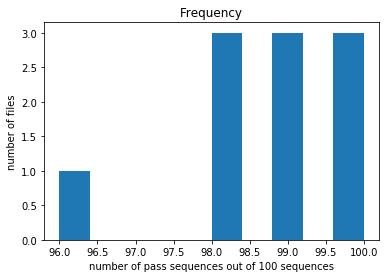

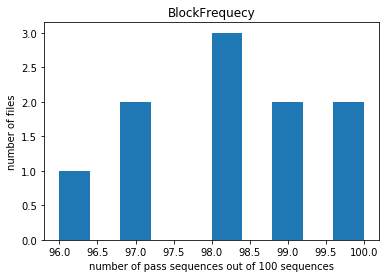

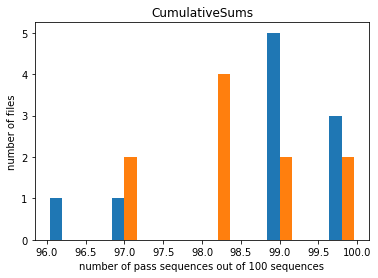

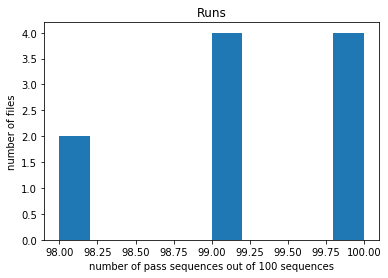

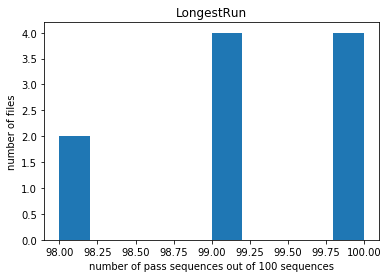

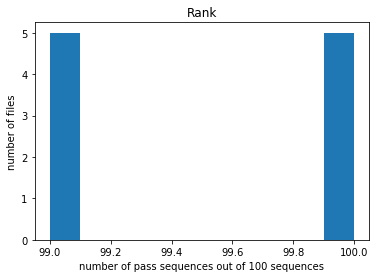

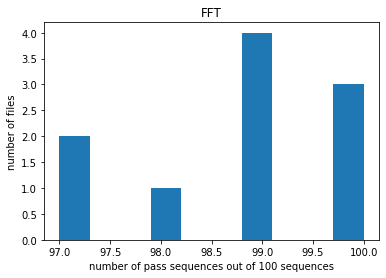

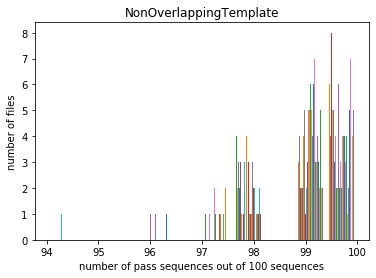

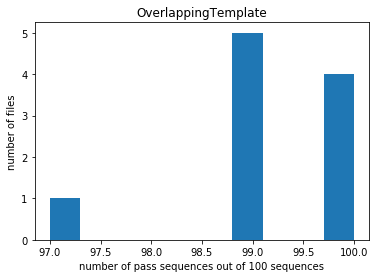

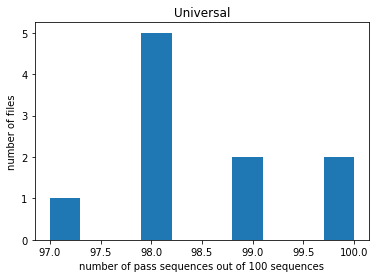

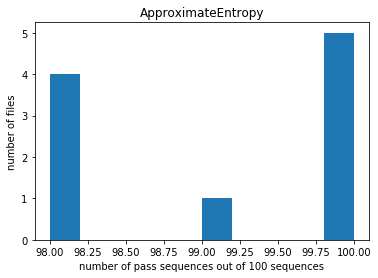

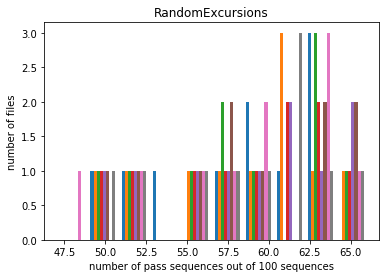

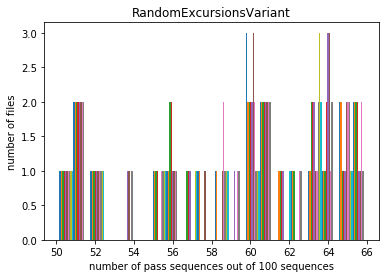

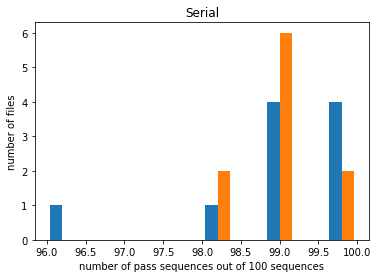

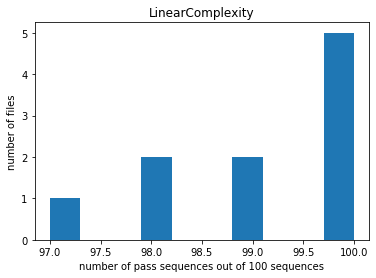

Pass rate of NonOverlappingTemplate: 0.400000
Pass rate of RandomExcursions: 0.900000
Pass rate of RandomExcursionsVariant: 1.000000
Pass rate of Frequency: 1.000000
Pass rate of BlockFrequecy: 1.000000
Pass rate of Runs: 1.000000
Pass rate of LongestRun: 1.000000
Pass rate of Rank: 1.000000
Pass rate of FFT: 1.000000
Pass rate of OverlappingTemplate: 1.000000
Pass rate of Universal: 1.000000
Pass rate of ApproximateEntropy: 1.000000
Pass rate of LinearComplexity: 1.000000
Pass rate of CumulativeSums in mode 0: 1.000000
Pass rate of CumulativeSums in mode 1: 1.000000
Pass rate of Serial in mode 0: 1.000000
Pass rate of Serial in mode 1: 1.000000


In [8]:
import numpy as np
import matplotlib.pyplot as plt

report_dict = {"Frequency":[], 
               "BlockFrequecy":[],
               "CumulativeSums":[[],[]], 
               "Runs":[], 
               "LongestRun":[], 
               "Rank":[], 
               "FFT":[],
               "NonOverlappingTemplate":[], 
               "OverlappingTemplate":[], 
               "Universal":[], 
               "ApproximateEntropy":[], 
               "RandomExcursions":[], 
               "RandomExcursionsVariant":[], 
               "Serial":[[], []], 
               "LinearComplexity":[]}
# append list
for i in range(148):
    report_dict["NonOverlappingTemplate"].append([])
for i in range(8):
    report_dict["RandomExcursions"].append([])
for i in range(18):
    report_dict["RandomExcursionsVariant"].append([])


# print(report_dict)

NonOverlappingTemplate_fail = 0
RandomExcursions_fail = 0
RandomExcursionsVariant_fail = 0

for index in range(10):
    
    star_NonOverlappingTemplate = False
    star_RandomExcursions = False
    star_RandomExcursionsVariant = False

    num = "%01d" % index
    f = open("File_Report_"+ num +".txt","r")

    # skip top text
    for i in range(7):
        words = f.readline()


    words = f.readline()    
    report_dict["Frequency"].append(int(words[60:63]))
    words = f.readline()    
    report_dict["BlockFrequecy"].append(int(words[60:63]))
    for i in range(2):
        words = f.readline()   
        report_dict["CumulativeSums"][i].append(int(words[60:63])) 
    words = f.readline()  
    report_dict["Runs"].append(int(words[60:63])) 
    words = f.readline()  
    report_dict["LongestRun"].append(int(words[60:63])) 
    words = f.readline()  
    report_dict["Rank"].append(int(words[60:63])) 
    words = f.readline()  
    report_dict["FFT"].append(int(words[60:63])) 
    for i in range(148):
        words = f.readline()  
        report_dict["NonOverlappingTemplate"][i].append(int(words[60:63]))
        if(words[69]=='*'):
            star_NonOverlappingTemplate = True
    words = f.readline()  
    report_dict["OverlappingTemplate"].append(int(words[60:63])) 
    words = f.readline()  
    report_dict["Universal"].append(int(words[60:63])) 
    words = f.readline()  
    report_dict["ApproximateEntropy"].append(int(words[60:63])) 
    for i in range(8):
        words = f.readline()  
        report_dict["RandomExcursions"][i].append(int(words[60:63]))
        if(words[69]=='*'):
            star_RandomExcursions = True
    for i in range(18):
        words = f.readline()  
        report_dict["RandomExcursionsVariant"][i].append(int(words[60:63]))
        if(words[69]=='*'):
            star_RandomExcursionsVariant = True
    for i in range(2):
        words = f.readline()  
        report_dict["Serial"][i].append(int(words[60:63])) 
    words = f.readline()  
    report_dict["LinearComplexity"].append(int(words[60:63])) 
    
    if (star_NonOverlappingTemplate == True):
        NonOverlappingTemplate_fail = NonOverlappingTemplate_fail + 1
    if (star_RandomExcursions == True):
        RandomExcursions_fail = RandomExcursions_fail + 1
    if (star_RandomExcursionsVariant == True):
        RandomExcursionsVariant_fail = RandomExcursionsVariant_fail + 1

    f.close()
    
fail = 0
for index in range(10):
    num = "%01d" % index
    f = open("File_Report_"+ num +".txt","r")

    # skip top text
    for i in range(7):
        words = f.readline()
    for i in range(188):
        words = f.readline()
        if(words[69]=='*'):
            fail = fail + 1
            break
pass_rate = (10-fail)/10.0
print(pass_rate)



# test
# bins = np.arange(min(report_dict[test]), max(report_dict[test])+2)-0.25
# plt.hist(report_dict[test], bins, align='mid', width=0.5)
# plt.xticks(range(min(report_dict[test]), max(report_dict[test])+1))
# plt.xlim([min(report_dict[test])-1, max(report_dict[test])+1])
# plt.show()


for test in report_dict:
    if(len(report_dict[test])==100):
        plt.title(test)
        bins = np.arange(min(report_dict[test]), max(report_dict[test])+2)-0.25
        plt.hist(report_dict[test], bins, align='mid', width=0.5)
        plt.xticks(range(min(report_dict[test]), max(report_dict[test])+1))
        plt.xlim([min(report_dict[test])-1, max(report_dict[test])+1])
        plt.axvline(95+0.25, color='red', linestyle='--')
        plt.xlabel('number of pass sequences out of 100 sequences')
        plt.ylabel('number of files')
        plt.savefig('figure/'+test+'.png')
        plt.show()

for test in report_dict:
    if(len(report_dict[test])!=100):
        plt.title(test)
        plt.hist(report_dict[test])
        plt.xlabel('number of pass sequences out of 100 sequences')
        plt.ylabel('number of files')
        plt.savefig('figure/'+test+'.png')
        plt.show()

print('Pass rate of NonOverlappingTemplate: %f' % ((10-NonOverlappingTemplate_fail)/10.0) )
print('Pass rate of RandomExcursions: %f' % ((10-RandomExcursions_fail)/10.0) )
print('Pass rate of RandomExcursionsVariant: %f' % ((10-RandomExcursionsVariant_fail)/10.0) )


simple_test = ["Frequency", 
               "BlockFrequecy",
               "Runs", 
               "LongestRun", 
               "Rank", 
               "FFT",
               "OverlappingTemplate", 
               "Universal", 
               "ApproximateEntropy", 
               "LinearComplexity"]
for test in simple_test:
    pass_file = 0
    for i in range(len(report_dict[test])):
        if(report_dict[test][i]>=96):
            pass_file = pass_file + 1
    pass_rate = pass_file/10.0
    print('Pass rate of %s: %f' %(test, pass_rate))

double_test = ["CumulativeSums", "Serial"]
for test in double_test:
    pass_file_0 = 0
    pass_file_1 = 0
    for i in range(len(report_dict[test][0])):
        if(report_dict[test][0][i]>=96):
            pass_file_0 = pass_file_0 + 1
        if(report_dict[test][1][i]>=96):
            pass_file_1 = pass_file_1 + 1
    pass_rate_0 = pass_file_0/10.0
    pass_rate_1 = pass_file_1/10.0
    print('Pass rate of %s in mode 0: %f' %(test, pass_rate_0))
    print('Pass rate of %s in mode 1: %f' %(test, pass_rate_1))
